# Problem Statement
Ebuss is a e-commerce company which has captured a huge market share in many fields. It sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.
With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

Objective is to build a model that will improve the recommendations given to the users given their past reviews and ratings. For this, we will analyse product reviews after some text preprocessing steps and build an ML model to get the sentiments corresponding to the users' reviews and ratings for multiple products. 

Tasks in building sentiment-based product recommendation system, includes:
* Data sourcing and sentiment analysis
* Building a recommendation system
* Improving the recommendations using the sentiment analysis model
* Deploying the end-to-end project with a user interface

### Data sourcing and sentiment analysis
In this task, we will analyse product reviews after some text preprocessing steps and build an ML model to get the sentiments corresponding to the users' reviews and ratings for multiple products. 
This dataset consists of 30,000 reviews for more than 200 different products. The reviews and ratings are given by more than 20,000 users. 

#### The steps to be performed for the first task are:

* Exploratory data analysis
* Data cleaning
* Text preprocessing
* Feature extraction: In order to extract features from the text data, you may choose from any of the methods, including bag-of-words, TF-IDF vectorization or word embedding.
* Training a text classification model: You need to build at least three ML models. You then need to analyse the performance of each of these models and choose the best model. At least three out of the following four models need to be built (Do not forget, if required, handle the class imbalance and perform hyperparameter tuning.). 
    1. Logistic regression
    2. Random forest
    3. XGBoost
    4. Naive Bayes

Out of these four models, select best classification model based on its performance.


### Building a recommendation system
We will be analyzing the following two recommendation systems:
    1. User-based recommendation system
    2. Item-based recommendation system

Select the best suited recommendation for this case. 

 
Once you get the best-suited recommendation system, the next task is to recommend 20 products that a user is most likely to purchase based on the ratings. You can use the 'reviews_username' (one of the columns in the dataset) to identify your user. 

 

### Improving the recommendations using the sentiment analysis model
Now, the next task is to link this recommendation system with the sentiment analysis model that was built earlier (recall that we asked you to select one ML model out of the four options). Once you recommend 20 products to a particular user using the recommendation engine, you need to filter out the 5 best products based on the sentiments of the 20 recommended product reviews.

In this way, you will get an ML model (for sentiments) and the best-suited recommendation system. Next, you need to deploy the entire project publically.

 

### Deployment of this end to end project with a user interface
Once you get the ML model and the best-suited recommendation system, you will deploy the end-to-end project. You need to use the Flask framework, which is majorly used to create web applications to deploy machine learning models.

To make the web application public, you need to use Heroku, which works as the platform as a service (PaaS) that helps developers build, run and operate applications entirely on the cloud.

Next, you need to include the following features in the user interface.

Take any of the existing usernames as input.
Create a submit button to submit the username.
Once you press the submit button, it should recommend 5 products based on the entered username.
Note: An important point that you need to consider here is that the number of users and the number of products are fixed in this case study, and you are doing the sentiment analysis and building the recommendation system only for those users who have already submitted the reviews or ratings corresponding to some of the products in the dataset. 

Because the dataset that you are going to use is huge, the model training may take time, and hence, you can use Google Colab to directly code or upload the already created notebook.


You can look into the user guide to access the Colab below.


### Assumption: No new users or products will be introduced or considered when building or predicting from the models built.

-

# Data sourcing and sentiment analysis

## Exploratory Data Analysis

In [1]:
# importing necessary library

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys
import re
from time import time

import sklearn
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

import collections

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import xgboost as xgb

import pickle as pkl

In [2]:
!pip install textblob

In [3]:
from textblob import TextBlob

In [4]:
# reading csv data file
df= pd.read_csv("sample30.csv", parse_dates=False)

In [5]:
# checking samples from dataset
df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [6]:
# checking data shape
df.shape

(30000, 15)

In [7]:
# checking metadata info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

##### Metadata Information
Attribute: Attribute Description
* **id:** Uniques identity number to identify each unique review given by the user to a particular product in the dataset
* **brand:** Name of the brand of the product to which user has given review and rating
* **categories:** Category of the product like household essentials, books, personal care products, medicines, cosmetic†items, beauty products, electrical appliances, kitchen and dining products, health care products and many more.
* **manufacturer:** Name of the manufacturer of the product
* **name:** Name of the product to which user has added review or rating
* **reviews_date:** Date on which the review has been added by the user
* **reviews_didPurchase:** Whether a particular user has purchased the product or not
* **reviews_doRecommend:** Whether a particular user has recommended the product or not
* **reviews_rating:** Rating given by the user to a particular product
* **reviews_text:** Review given by the user to a particular product
* **reviews_title:** The title of the review given by the user to a particular product
* **reviews_userCity:** The residing city of the user
* **reviews_userProvince:** The residing province of the user
* **reviews_username:** The unique identification for individual user in the dataset
* **user_sentiment:** The overall sentiment of the user for a particular product (Positive or Negative)!

In [8]:
# checking for missing values
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64

In [9]:
# checking for missing values for each column
round(100*(df.isnull().sum()/len(df.index)), 2)

id                       0.00
brand                    0.00
categories               0.00
manufacturer             0.47
name                     0.00
reviews_date             0.15
reviews_didPurchase     46.89
reviews_doRecommend      8.57
reviews_rating           0.00
reviews_text             0.00
reviews_title            0.63
reviews_userCity        93.57
reviews_userProvince    99.43
reviews_username         0.21
user_sentiment           0.00
dtype: float64

Both **reviews_userCity** and **reviews_userProvince** are related to location information and have over **90% data missing**; since we don't need this for our analysis, therefore dropping these columns

In [10]:
# Dropping reviews_userCity and reviews_userProvince
df=df.drop(["reviews_userCity","reviews_userProvince"],axis=1)

Before proceeding with any further data cleaning/imputation. Lets first look into most important data for our analysis: reviews_rating; reviews_doRecommend, reviews_didPurchase and user_sentiment

In [11]:
# reviews_rating is a numberic; checking for descriptive statistics

df["reviews_rating"].describe()

count    30000.000000
mean         4.483133
std          0.988441
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviews_rating, dtype: float64

In [12]:
# checking for unique values in reviews_rating

df["reviews_rating"].unique()

array([5, 1, 3, 4, 2])

In [13]:
# checking for value_counts in reviews_rating

df["reviews_rating"].value_counts()

5    20831
4     6020
1     1384
3     1345
2      420
Name: reviews_rating, dtype: int64

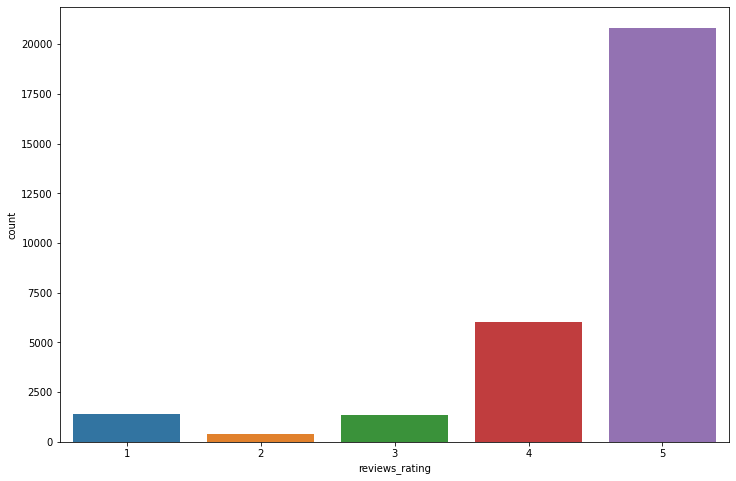

In [14]:
# visualizing distribution of reviews_rating with countplot
plt.figure(figsize=(12,8))
ax = sns.countplot(x='reviews_rating', data=df)

* Average rating of all products reviewed is **4.8**
* **90%** reviews have a rating of  **4 & 5**

This indicates users like the products offered. However, this also indicates **imbalance** is the data used for this analysis

In [15]:
# reviews_doRecommend has 8.5% records missing values; checking value_counts

df["reviews_doRecommend"].value_counts()

True     25880
False     1550
Name: reviews_doRecommend, dtype: int64

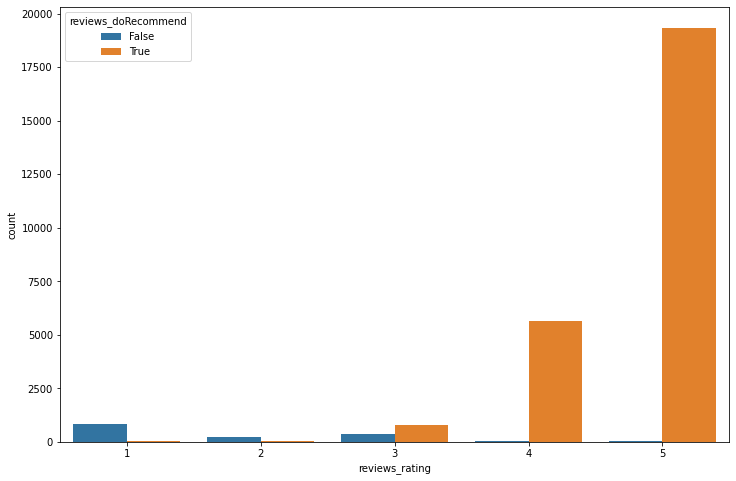

In [16]:
# Visualizing the distribution of reviews_doRecommend over reviews_rating

plt.figure(figsize=(12,8))
ax = sns.countplot(x='reviews_rating', hue="reviews_doRecommend", data=df)

Over **85%** reviews have recommended the products reviewed and this is inline with the raings data as seen in the chart. We can impute the missing values with reviews_rating

In [17]:
# Imputing missing values with reviews_rating by apply the logic: 
# rating of 3 above as True and those below 3 as False

df.reviews_doRecommend.loc[df["reviews_doRecommend"].isnull()]=df['reviews_rating'].apply(lambda x: True if x >=3 else False)

/Users/z062960/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [18]:
# checking value_counts of updated reviews_doRecommend

df["reviews_doRecommend"].value_counts()

True     27826
False     2174
Name: reviews_doRecommend, dtype: int64

In [19]:
# reviews_didPurchase has 46% missing values
# checking value_counts to see if the remaining data is useful to understand purchase behaviour

df["reviews_didPurchase"].value_counts()

False    14498
True      1434
Name: reviews_didPurchase, dtype: int64

* Less than **5%** reviews show purchase of product
* **48%** have not purchased 
* **47%** are missing values; 

This data is not very usefull for analysis and harder to impute; therefore dropping this column

In [20]:
# Dropping reviews_didPurchase from analysis

df=df.drop(["reviews_didPurchase"],axis=1)

In [21]:
# user_sentiment has only 1 missiing value, lets check the value_counts

df["user_sentiment"].value_counts()

Positive    26632
Negative     3367
Name: user_sentiment, dtype: int64

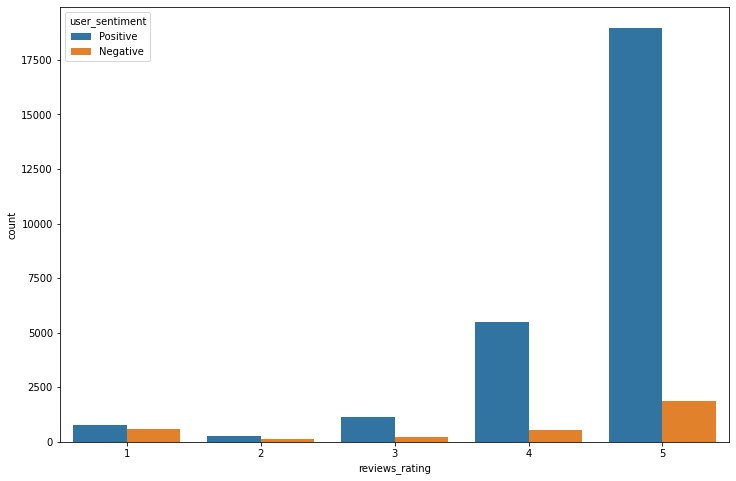

In [22]:
# Visualizing the distribution of user_sentiment over reviews_rating

plt.figure(figsize=(12,8))
ax = sns.countplot(x='reviews_rating', hue="user_sentiment", data=df)

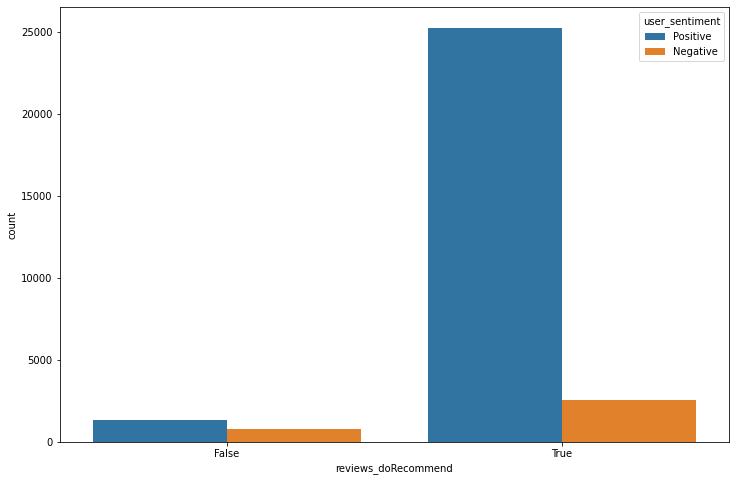

In [23]:
# Visualizing the distribution of user_sentiment over reviews_doRecommend

plt.figure(figsize=(12,8))
ax = sns.countplot(x='reviews_doRecommend', hue="user_sentiment", data=df)

**88.7%** reviews have 'Positive' sentiment, which is inline with reviews_rating

However, the distribution of user_sentiment over reviews_rating and reviews_doRecommend shows inaccuracy in data.
* reviews_rating of 1 has more Positive user_sentiment
* reviews_rating of 4 and 5 has more than anticiipated number of Negative user_sentiment
* Many negative sentiments associated with products recommended

user_sentiment in its current form may not be usefult for our analysis

In [24]:
# lets look at the row level data with missing user_sentiment

df[df["user_sentiment"].isnull()]

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment
28354,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,Planes: Fire Rescue (2 Discs) (includes Digita...,2014-11-07T00:00:00.000Z,True,5,my kids absolutely loved this film so much tha...,a super hit with my children. they loved it!!??,7.87E+11,NaN


In [25]:
# This record has reviews_rating = 5 with reviews_doRecommend = True; we can still impute missing value as 'Positive'
# therefore replacing the null values as Positive

df["user_sentiment"] = df["user_sentiment"].fillna('Positive')

Lets check the products and other attributes like brands, manufacturer, categories being review 

In [26]:
# checking the number of unique products that are reviewed
df['id'].nunique()

271

In [27]:
# creating subset of all attributes associate with product 
df_products = df[['id', 'name', 'brand', 'manufacturer', 'categories']]
df_products

,id,name,brand,manufacturer,categories
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Universal Music,Universal Music Group / Cash Money,"Movies, Music & Books,Music,R&b,Movies & TV,Mo..."
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Lundberg,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co..."
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Lundberg,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co..."
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,K-Y,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm..."
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,K-Y,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm..."
...,...,...,...,...,...
29995,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,L'oreal Paris,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday..."
29996,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,L'oreal Paris,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday..."
29997,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,L'oreal Paris,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday..."
29998,AVpfW8y_LJeJML437ySW,L'or233al Paris Elvive Extraordinary Clay Reba...,L'oreal Paris,L'oreal Paris,"Beauty,Hair Care,Shampoo & Conditioner,Holiday..."


In [28]:
# removing duplicates to get unique attributes

df_products.drop_duplicates(subset=['id', 'name', 'brand', 'manufacturer', 'categories'],inplace=True)
df_products

<ipython-input-28-34d323f3b2b3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_products.drop_duplicates(subset=['id', 'name', 'brand', 'manufacturer', 'categories'],inplace=True)


,id,name,brand,manufacturer,categories
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),Universal Music,Universal Music Group / Cash Money,"Movies, Music & Books,Music,R&b,Movies & TV,Mo..."
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,Lundberg,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co..."
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,K-Y,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm..."
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream",J.R. Watkins,J.R. Watkins,"Personal Care,Skin Care,Hand Cream,Beauty,Body..."
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar,AMBI,FLEMING & CO,"Personal Care,Bath, Shower & Soap,Featured Bra..."
...,...,...,...,...,...
28769,AVpfv4TlilAPnD_xhjNS,Various - Red Hot Blue:Tribute To Cole Porter ...,Target.com Use Only,Capitol,"Movies, Music & Books,Music,R&b,Jazz,Electroni..."
28772,AVpfvieo1cnluZ0-qdnu,L'oreal Paris Advanced Hairstyle TXT IT Hyper-...,L'Oreal Paris,Generic,"Personal Care,Hair Care,Styling Gel/Lotion,Bea..."
28795,AVpfVMhR1cnluZ0-ixY8,2017-2018 Brownline174 Duraflex 14-Month Plann...,Brownline,120,"School & Office Supplies,Calendars & Planners,..."
28799,AVpfVPh3ilAPnD_xZzW9,Mrs. Meyer's Lemon Verbena Surface Scrub,Mrs. Meyer's,Mrs. Meyers,"Household Chemicals,Household Cleaners,Glass a..."


In [29]:
# checking for missing values

df_products.isnull().sum()

id              0
name            0
brand           0
manufacturer    1
categories      0
dtype: int64

In [30]:
# checking the data row of manufacturer missing
df_products[df_products["manufacturer"].isnull()]

,id,name,brand,manufacturer,categories
22210,AVpfOIrkilAPnD_xXgDG,Alex Cross (dvdvideo),Summit Entertainment,NaN,"Movies & TV Shows,Instawatch Movies By VUDU,In..."


In [31]:
# The brand associated with missing manufacturer is 'Summit Entertainment'
# check all manufacturer associated with brand 'Summit Entertainment'
df_products[df_products["brand"]=='Summit Entertainment']

,id,name,brand,manufacturer,categories
5591,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),Summit Entertainment,Summit Entertainment,"Movies & TV Shows,Instawatch Movies By VUDU,Sh..."
22210,AVpfOIrkilAPnD_xXgDG,Alex Cross (dvdvideo),Summit Entertainment,NaN,"Movies & TV Shows,Instawatch Movies By VUDU,In..."


In [32]:
# 'Summit Entertainment' is the only manufacturer associated with brand 'Summit Entertainment' 
# we can impute missing values in manufacturer as 'Summit Entertainment' 

df_products = df_products.drop(df_products[(df_products['manufacturer'].isnull())].index)

In [33]:
# updating the primary data imputing missing manufacturer as 'Summit Entertainment' 
df["manufacturer"] = df["manufacturer"].fillna('Summit Entertainment')

In [34]:
# checking top 20 product name reviewed
df['name'].value_counts().sort_values(ascending=False).head(20)

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                                        8545
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                  3325
Clorox Disinfecting Bathroom Cleaner                                                             2039
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz                   1186
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                              1143
Burt's Bees Lip Shimmer, Raisin                                                                   873
The Resident Evil Collection 5 Discs (blu-Ray)                                                    845
Mike Dave Need Wedding Dates (dvd + Digital)                                                      757
Nexxus Exxtra Gel Style Creation Sculptor                                                         693
Red (special Edition) (dvdvideo)                                                  

<AxesSubplot:>

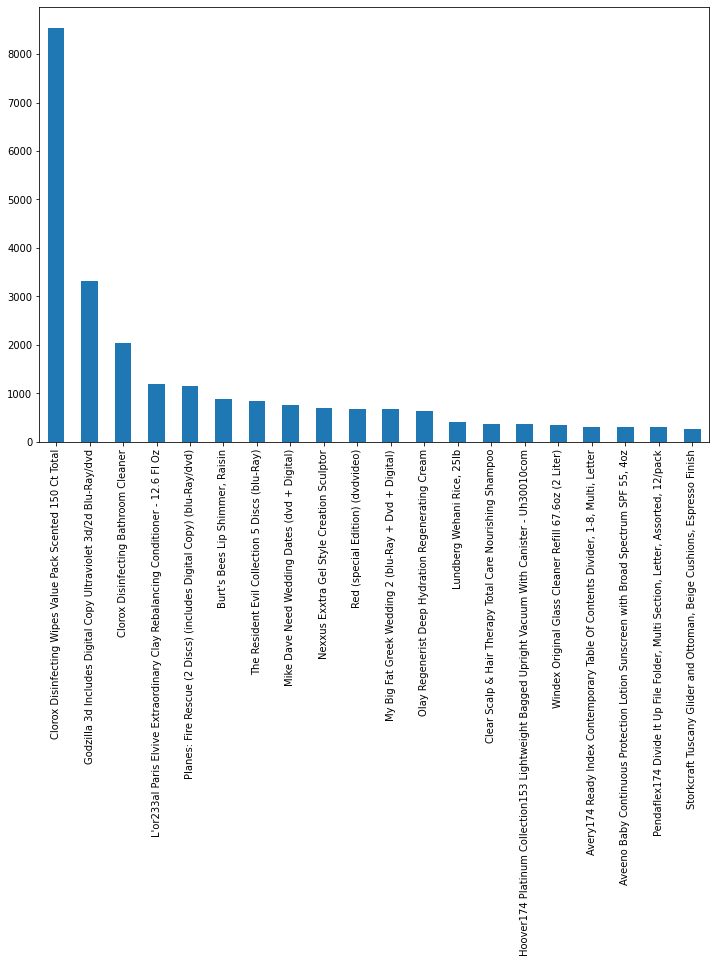

In [35]:
# visualizing the distribution of reviews for top 20 product name
plt.figure(figsize=(12,8))
df['name'].value_counts().sort_values(ascending=False).head(20).plot(kind= "bar")

In [36]:
# looking at distribution of reviews_rating for the top product name

df.loc[df['name']=='Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total'].groupby('reviews_rating')['name'].count()

reviews_rating
1      16
2      11
3      71
4    1295
5    7152
Name: name, dtype: int64

Over 90% of reviews for this brand are 4+

In [37]:
# checking top 20 product brands reviewed
df['brand'].value_counts().sort_values(ascending=False).head(20)

Clorox                        10585
Warner Home Video              3325
Disney                         1200
L'oreal Paris                  1186
FOX                             887
Burt's Bees                     881
Sony Pictures                   845
Summit Entertainment            813
Nexxus                          693
Universal Home Video            668
Olay                            637
Warner Bros.                    458
Lundberg                        414
Clear Scalp & Hair Therapy      372
Hoover                          362
Windex                          348
Avery                           314
Aveeno                          313
Pendaflex                       310
Tostitos                        286
Name: brand, dtype: int64

<AxesSubplot:>

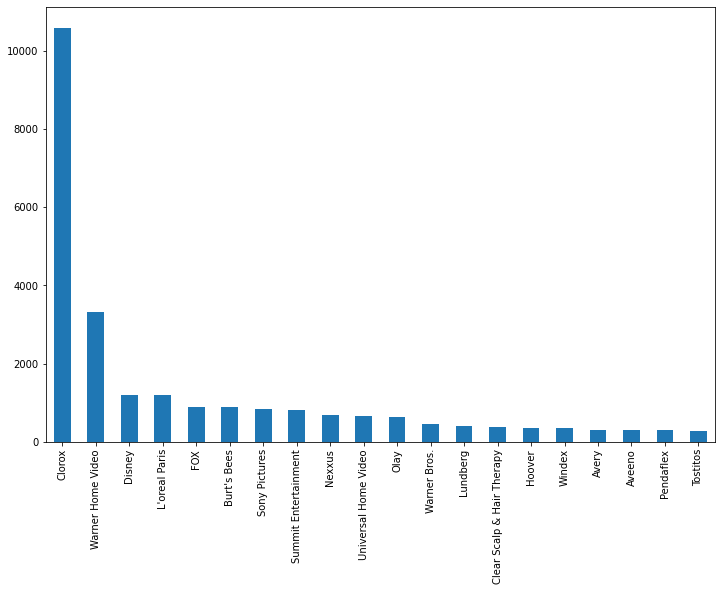

In [38]:
# visualizing the distribution of reviews for top 20 product brand
plt.figure(figsize=(12,8))
df['brand'].value_counts().sort_values(ascending=False).head(20).plot(kind= "bar")

Top Brands
1. Clorox has 28% reviews
2. Warner Home Video has 11% reviews
3. Disney has 4% review

In [39]:
# looking at distribution of reviews_rating for the top product brand

df.loc[df['brand']=='Clorox'].groupby('reviews_rating')['brand'].count()

reviews_rating
1      29
2      12
3      87
4    1534
5    8923
Name: brand, dtype: int64

In [40]:
# checking top 20 product manufacturer reviewed
df['manufacturer'].value_counts().sort_values(ascending=False).head(20)

Clorox                    8546
Test                      3325
AmazonUs/CLOO7            2039
L'oreal Paris             1232
Walt Disney               1143
Burt's Bees                873
SONY CORP                  845
Summit Entertainment       813
Twentieth Century Fox      757
P&G                        730
Nexxus Beauty Products     693
Universal                  668
Lundberg Family Farms      412
Clear                      372
Hoover                     362
Windex                     348
Avery Dennison             313
Aveeno Baby                313
Esselte Corporation        310
Tostitos                   265
Name: manufacturer, dtype: int64

manufacturer named **Test** has 11% review; this looks like data entry issue; we could impute this based on brand. However, since we are not performing analysis on manufacturer we can drop this column

In [41]:
# Dropping manufacturer

df=df.drop(["manufacturer"],axis=1)

In [42]:
# checking top 20 product manufacturer reviewed
df['categories'].value_counts().sort_values(ascending=False).head(20)

Household Essentials,Cleaning Supplies,Kitchen Cleaners,Cleaning Wipes,All-Purpose Cleaners,Health & Household,Household Supplies,Household Cleaning,Ways To Shop,Classroom Essentials,Featured Brands,Home And Storage & Org,Clorox,Glass Cleaners,Surface Care & Protection,Business & Industrial,Cleaning & Janitorial Supplies,Cleaners & Disinfectants,Cleaning Wipes & Pads,Cleaning Solutions,Housewares,Target Restock,Food & Grocery,Paper Goods,Wipes,All Purpose Cleaners    8545
Movies, Music & Books,Movies,Action & Adventure,Movies & Music,Movies & TV Shows,Frys                                                                                                                                                                                                                                                                                                                                                                                                   3325
Household Chemicals,Household Cleaners,Bath & 

Now lets look at Users and reviews

In [43]:
# checking number of unique reviews_username
df['reviews_username'].nunique()

24914

In [44]:
# checking for null values reviews_username
df['reviews_username'].isnull().sum()

63

In [45]:
# checking top 20 reviewers
df['reviews_username'].value_counts().sort_values(ascending=False).head(20)

mike                 41
byamazon customer    41
chris                32
lisa                 16
sandy                15
tony                 15
rick                 15
dave                 14
john                 14
jojo                 13
james                13
movielover           12
matt                 12
linda                12
cindy                11
donna                11
laura                11
jenn                 11
scott                11
mark                 11
Name: reviews_username, dtype: int64

<AxesSubplot:>

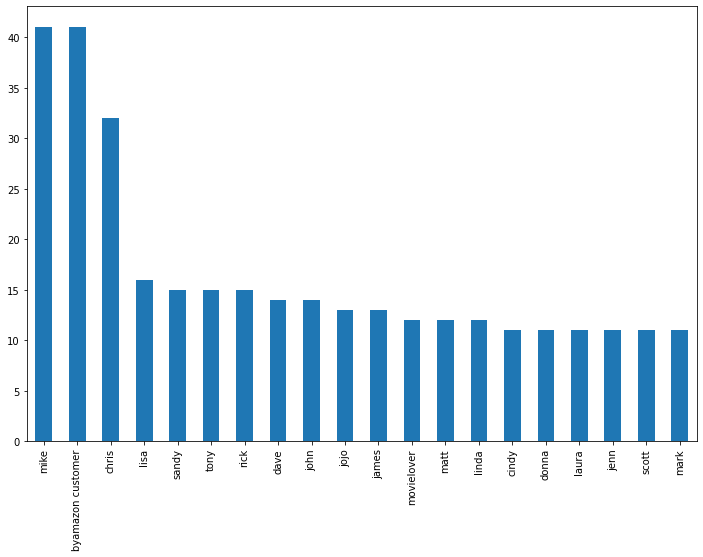

In [46]:
# visualizing the distribution of reviews for top 20 reviews_username
plt.figure(figsize=(12,8))
df['reviews_username'].value_counts().sort_values(ascending=False).head(20).plot(kind= "bar")

* There are **63 missing values** in reviews_username
* **byamazon customer** has given 41 reviews; This name appears to be generic and not an individual user.
* We also cannot impute this based on other columns

Since we are going to perform user-user recommendation later in the analysis; it would be best to drop these records after the Sentiment analysis

In [47]:
# looking at distribution of reviews_rating for the top user mike

df.loc[df['reviews_username']=='mike'].groupby('reviews_rating')['reviews_username'].count()

reviews_rating
1     2
3     3
4    10
5    26
Name: reviews_username, dtype: int64

Lets check the reviews data

In [48]:
# checking sample of review_text
df["reviews_text"].head(20)

0     i love this album. it's very good. more to the...
1     Good flavor. This review was collected as part...
2                                          Good flavor.
3     I read through the reviews on here before look...
4     My husband bought this gel for us. The gel cau...
5     My boyfriend and I bought this to spice things...
6     Bought this earlier today and was excited to c...
7     I bought this product for my husband and I to ...
8     My husband and I bought this for some extra fu...
9     Got as a surprise for my husband there is noth...
10    tried it with my husband and felt no different...
11    Purchased this thinking it would have some sor...
12    Bought this to enhance our time a bit, did abs...
13    I bought this after really liking the his n he...
14    First time purchase of this type of product. M...
15    I bought this and tried this with my wife but ...
16    I bought this product to spice things up with ...
17    I bought this to try to spice things up, b

In [49]:
# as this is text data converting to string object
df["reviews_text"]=df["reviews_text"].astype('str')

In [50]:
## checking the length of reviews_text
print(min(len(i) for i in df.reviews_text))
print(max(len(i) for i in df.reviews_text))

2
5865


In [51]:
# checking sample of reviews_title
df["reviews_title"].head(20)

0                    Just Awesome
1                            Good
2                            Good
3                    Disappointed
4                      Irritation
5                    Not worth it
6                   Disappointing
7                Not happy at all
8              Very disappointing
9                       Don't buy
10            pretty dissapoitned
11                 Waste of Money
12                 waste of money
13    Not happy with this product
14                   Disappointed
15            Not what I expected
16          Was so disappointed!!
17             very disappointed!
18                    Pretty nice
19               First time using
Name: reviews_title, dtype: object

In [52]:
# as this is text data converting to string object
df["reviews_title"]=df["reviews_title"].astype('str')

In [53]:
## checking the length of reviews_title
print(min(len(i) for i in df.reviews_title))
print(max(len(i) for i in df.reviews_title))

1
180


In [54]:
# comparing samples of reviews_title and reviews_text

df[["reviews_title", "reviews_text"]].head(20)

,reviews_title,reviews_text
0,Just Awesome,i love this album. it's very good. more to the...
1,Good,Good flavor. This review was collected as part...
2,Good,Good flavor.
3,Disappointed,I read through the reviews on here before look...
4,Irritation,My husband bought this gel for us. The gel cau...
5,Not worth it,My boyfriend and I bought this to spice things...
6,Disappointing,Bought this earlier today and was excited to c...
7,Not happy at all,I bought this product for my husband and I to ...
8,Very disappointing,My husband and I bought this for some extra fu...
9,Don't buy,Got as a surprise for my husband there is noth...


Since reviews_title and reviews_text are user provided inputs it would be best to combine them for text processing task

In [55]:
#creating a new column by concatenating both columns
df['text'] = [' '.join(i) for i in zip(df["reviews_title"].map(str),df["reviews_text"])]

In [56]:
# comparing samples of reviews_title and reviews_text  with reviews_text_combined

df[["reviews_title", "reviews_text", "text"]].head(20)

,reviews_title,reviews_text,text
0,Just Awesome,i love this album. it's very good. more to the...,Just Awesome i love this album. it's very good...
1,Good,Good flavor. This review was collected as part...,Good Good flavor. This review was collected as...
2,Good,Good flavor.,Good Good flavor.
3,Disappointed,I read through the reviews on here before look...,Disappointed I read through the reviews on her...
4,Irritation,My husband bought this gel for us. The gel cau...,Irritation My husband bought this gel for us. ...
5,Not worth it,My boyfriend and I bought this to spice things...,Not worth it My boyfriend and I bought this to...
6,Disappointing,Bought this earlier today and was excited to c...,Disappointing Bought this earlier today and wa...
7,Not happy at all,I bought this product for my husband and I to ...,Not happy at all I bought this product for my ...
8,Very disappointing,My husband and I bought this for some extra fu...,Very disappointing My husband and I bought thi...
9,Don't buy,Got as a surprise for my husband there is noth...,Don't buy Got as a surprise for my husband the...


## Text preprocessing

For sentiment analysis we mainly need review data i.e. reviews_rating, text, product name, and reviews_username

In [57]:
df_reviews = df[['reviews_rating', 'text']]

In [58]:
df_reviews.head()

,reviews_rating,text
0,5,Just Awesome i love this album. it's very good...
1,5,Good Good flavor. This review was collected as...
2,5,Good Good flavor.
3,1,Disappointed I read through the reviews on her...
4,1,Irritation My husband bought this gel for us. ...


In [59]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviews_rating  30000 non-null  int64 
 1   text            30000 non-null  object
dtypes: int64(1), object(1)
memory usage: 468.9+ KB


When we looked into user_sentiment the data as not inline with the rating and revommendationdata 
Our objective is to classify user reviews in to 'Positive' or 'Negative' sentiments. Since this is a binary calssification; we'll use reviews_rating to create the classification based on logic:
* reviews_rating of 3 to be considered as 'Positive' 
* reviews_rating below 3 to be considered as 'Negatiive'

This is based on our domain understanding of ratings data and was also apparent when we looked at reviews_doRecommend

In [60]:
df_reviews['sentiment']=df_reviews['reviews_rating'].apply(lambda x: 1 if x >=3 else 0)

<ipython-input-60-8474f151350d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['sentiment']=df_reviews['reviews_rating'].apply(lambda x: 1 if x >=3 else 0)


In [61]:
# checking the distribution of sentiiment

df_reviews["sentiment"].value_counts()

1    28196
0     1804
Name: sentiment, dtype: int64

In [62]:
# dropping reviews_rating
df_reviews=df_reviews.drop(["reviews_rating"],axis=1)

Steps for text preprocessing/cleaning for sentiment analysus
* Converting to lower case for uniformity
* Removing punctuation and special characters
* Removing stop words
* Lemmitization
* TF-IDF vectorization
* Word vectorization

In [63]:
df_reviews.head()

,text,sentiment
0,Just Awesome i love this album. it's very good...,1
1,Good Good flavor. This review was collected as...,1
2,Good Good flavor.,1
3,Disappointed I read through the reviews on her...,0
4,Irritation My husband bought this gel for us. ...,0


##### Converting to lower case for uniformity

In [64]:
# function to convert to lower case for uniformity

def words(sent):
    "Convert text to lower case and tokenise the document"
    return re.findall(r'\w+', sent.lower())

##### removing punctuation, special characters, integers,  stop words and corrent words

In [65]:
# function to removing punctuation, special characters, integers,  stop words and corrent words
def clean_text(text):
        
    # Convert words to lower case
    text = text.lower()
    corrected_words = []
    sent = []
    
    # Format words and remove unwanted characters   
    text = re.sub(r'\n', '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'//', '', text)
    text = re.sub(r'[_"\-;%()|.,+&=*%.,!?:#@$\[\]]', ' ', text)
    
    # Remove stop words
    text = text.split()
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    
    text = " ".join(text)
    
    return text

In [66]:
# Clean the text
for row in df_reviews.iterrows():
    row[1]['text'] = clean_text(row[1]['text'])

In [67]:
df_reviews.head()

,text,sentiment
0,Just Awesome i love this album. it's very good...,1
1,Good Good flavor. This review was collected as...,1
2,Good Good flavor.,1
3,Disappointed I read through the reviews on her...,0
4,Irritation My husband bought this gel for us. ...,0


In [68]:
## word corpus
print('Unique words: {}'.format(len({word for desc in df_reviews.text for word in desc.split()})))

Unique words: 46580


In [69]:
# Create the word vocab
import collections
words = [word for desc in df_reviews.text for word in desc.split()]
word_counts = collections.Counter(words)

In [70]:
word_counts

Counter({'Just': 429,
         'Awesome': 745,
         'i': 2082,
         'love': 6917,
         'this': 13506,
         'album.': 13,
         "it's": 1401,
         'very': 3555,
         'good.': 405,
         'more': 1933,
         'to': 23620,
         'the': 39975,
         'hip': 2,
         'hop': 2,
         'side': 144,
         'than': 1900,
         'her': 439,
         'current': 40,
         'pop': 54,
         'sound..': 1,
         'SO': 102,
         'HYPE!': 1,
         'listen': 31,
         'everyday': 379,
         'at': 3063,
         'gym!': 2,
         'give': 364,
         'it': 16299,
         '5star': 2,
         'rating': 24,
         'all': 4365,
         'way.': 94,
         'metaphors': 1,
         'are': 6460,
         'just': 2693,
         'crazy.': 9,
         'Good': 1776,
         'flavor.': 73,
         'This': 13541,
         'review': 9018,
         'was': 15800,
         'collected': 8745,
         'as': 13817,
         'part': 9012,
         

##### Lemmatising

In [71]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatising(document):
    
    # tokenize into words
    words = word_tokenize(document)
    
    words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]
    
    # join words to make sentence
    document = " ".join(words)
    
    return document

In [72]:
df_reviews["text"] = df_reviews["text"].apply(lambda x: lemmatising(x))

In [73]:
df_reviews.head()

,text,sentiment
0,Just Awesome i love this album . it 's very go...,1
1,Good Good flavor . This review be collect as p...,1
2,Good Good flavor .,1
3,Disappointed I read through the review on here...,0
4,Irritation My husband buy this gel for us . Th...,0


##### TF-IDF vectorization

In [74]:
# creating TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(use_idf=True, ngram_range=(1,1), min_df = 0.1) 

In [75]:
# transforming the text data with TfidfVectorizer
tfidf_features=tfidf_vectorizer.fit_transform(df_reviews['text'])

In [76]:
(tfidf_features)

<30000x45 sparse matrix of type '<class 'numpy.float64'>'
	with 358106 stored elements in Compressed Sparse Row format>

In [77]:
df_reviews.head()

,text,sentiment
0,Just Awesome i love this album . it 's very go...,1
1,Good Good flavor . This review be collect as p...,1
2,Good Good flavor .,1
3,Disappointed I read through the review on here...,0
4,Irritation My husband buy this gel for us . Th...,0


##### Visualizing text data with word cloud 

In [78]:
!pip install wordcloud

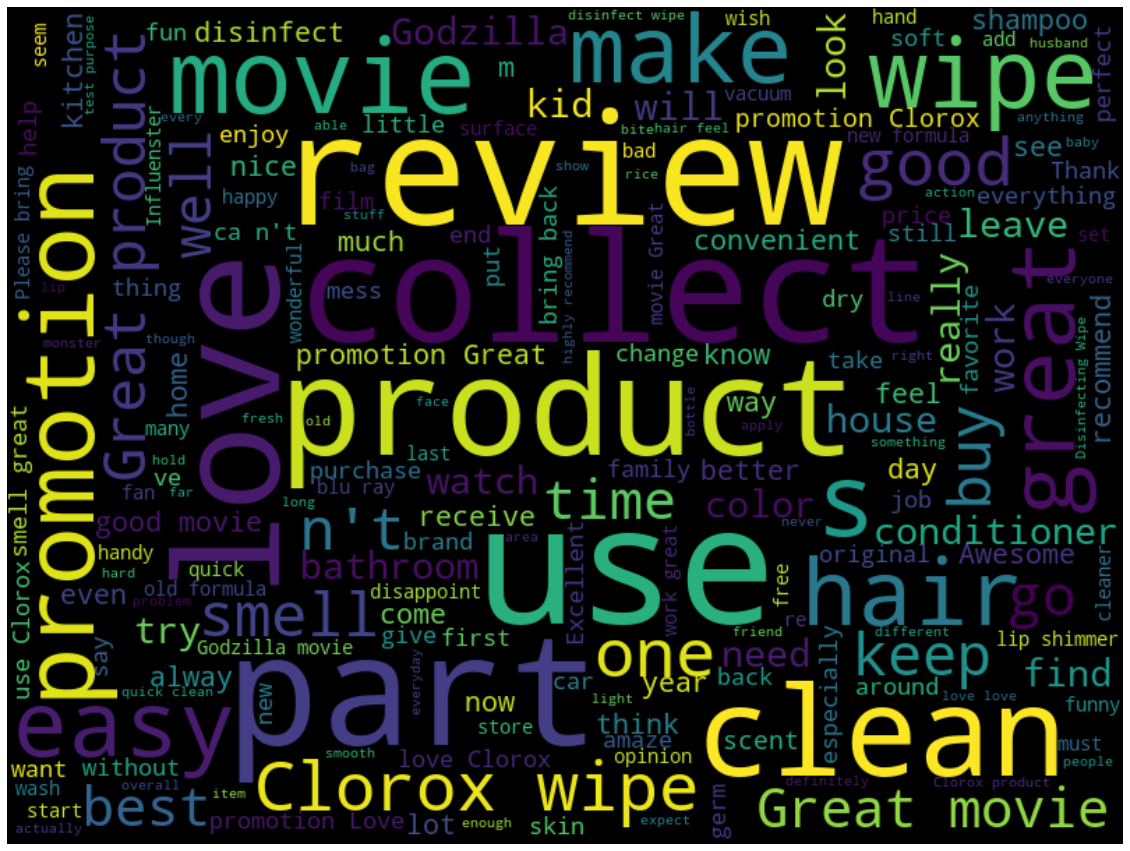

In [79]:
#let's form the word cloud of sentiments
#A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes
all_words = ' '.join([text for text in df_reviews['text']])

from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 600, random_state = 21, max_font_size = 120).generate(all_words)

plt.figure(figsize=(20, 16))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

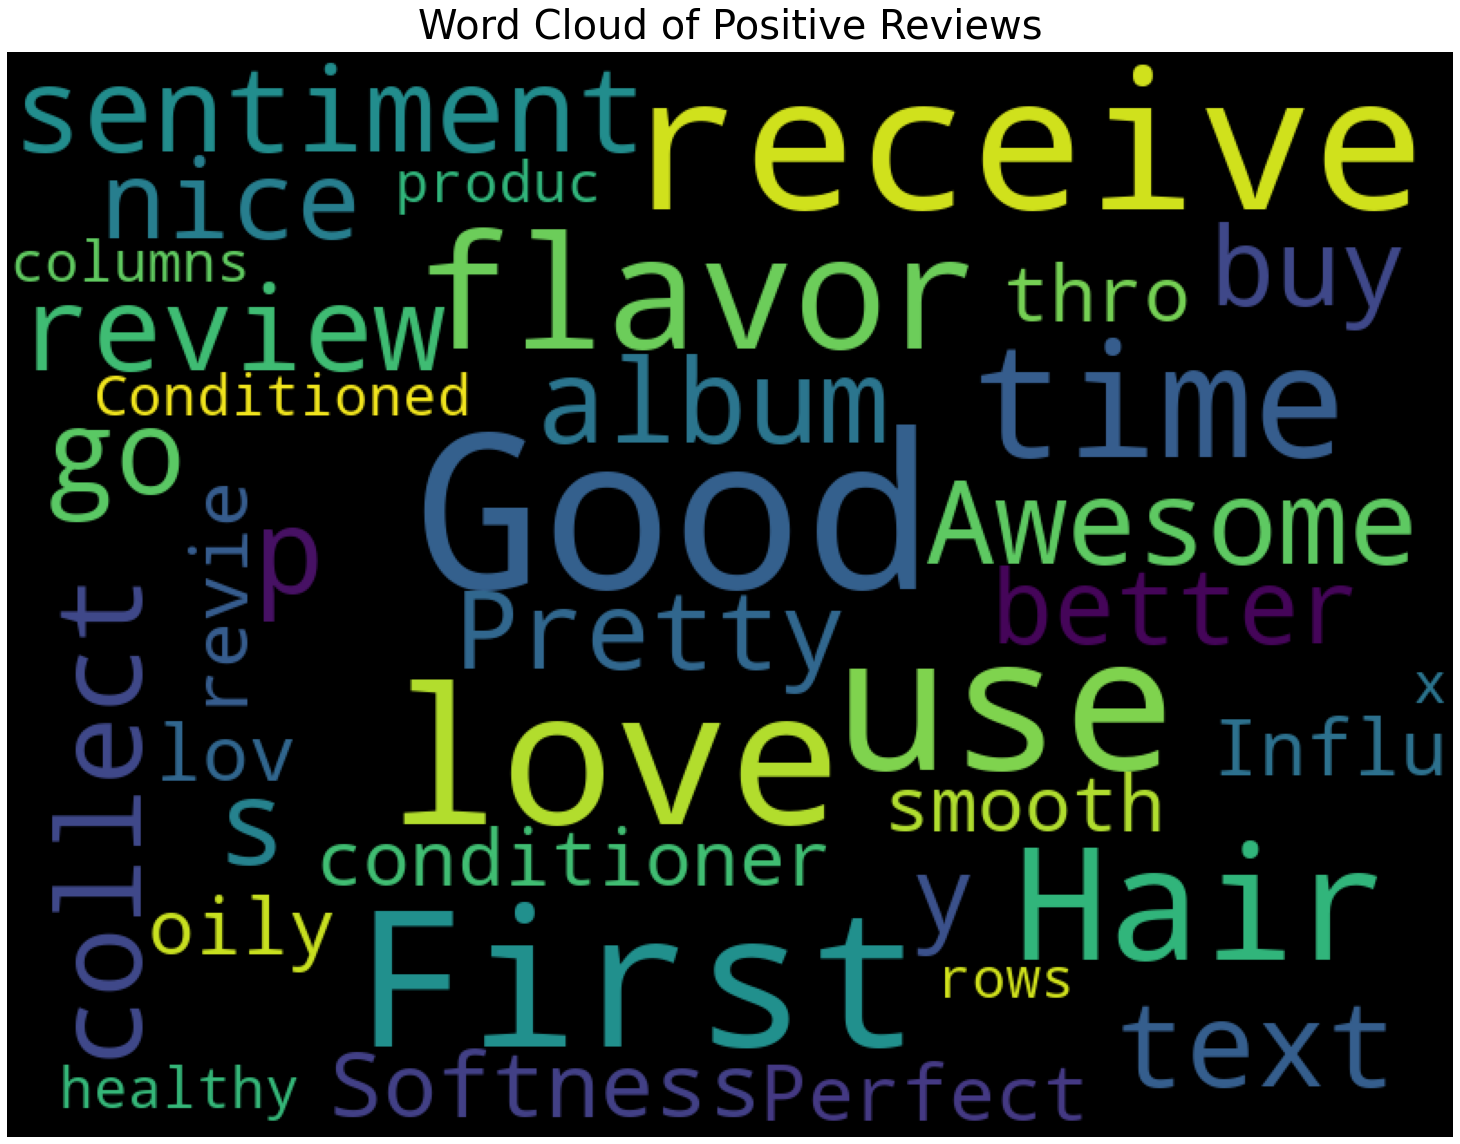

In [80]:
# to see the positive reviews wordcloud
wordcloud.generate(str(df_reviews.loc[df_reviews['sentiment']==1]))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Positive Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()

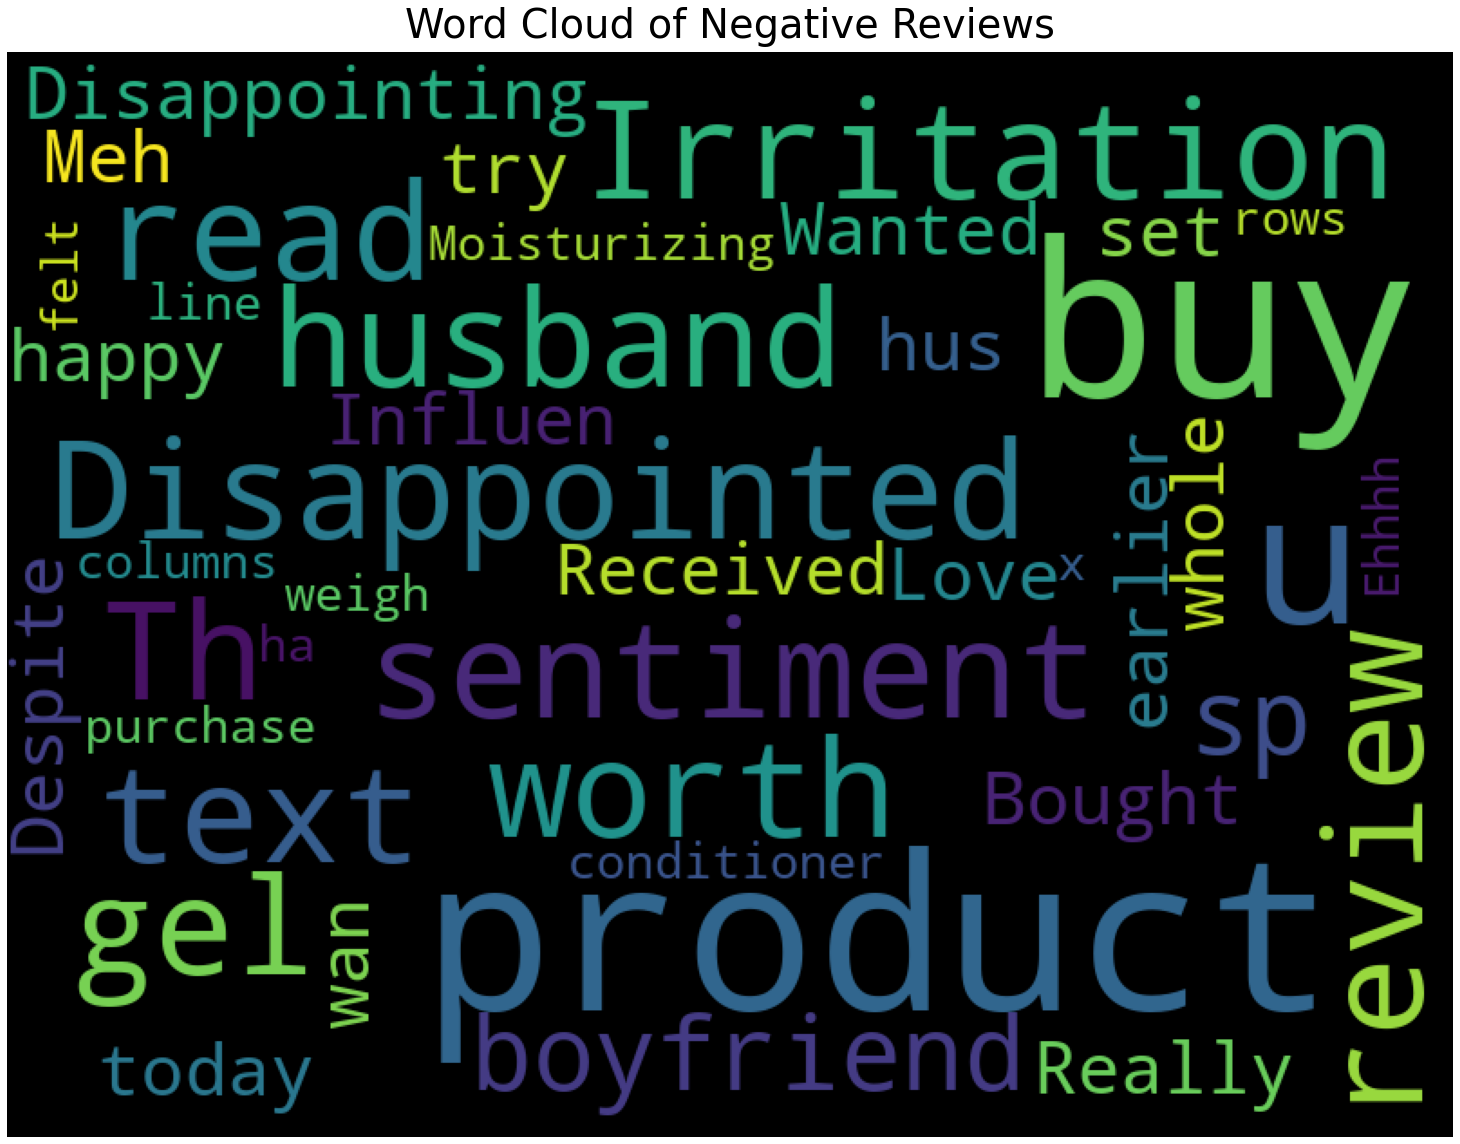

In [81]:
# to see the negative reviews wordcloud
wordcloud.generate(str(df_reviews.loc[df_reviews['sentiment']==0]))
plt.figure(figsize=(24.0,16.0))
plt.imshow(wordcloud);
plt.title(f"Word Cloud of Negative Reviews", fontdict={'size': 40, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
plt.axis('off');
plt.tight_layout()

In [82]:
# adding sentiment column to main dataset
df['sentiment'] = df_reviews['sentiment']

In [83]:
# adding the featurized text back to main dataset
df['text'] = df_reviews['text']

##### Creating pickle files to saving data and tfidf_features for deployment

In [84]:
# saving data file
pkl.dump(df, open("dataset/data.pkl", "wb"))

In [85]:
# saving data file
pkl.dump(tfidf_vectorizer, open("models/tfidf_features.pkl", "wb"))

## Model Building
Creating the 3 models for Sentiment Classification
1. Logistic regression
2. Random Forest
3. XG Boost Classifier 

In [86]:
# splitting data into test & train datasets to build sentiment analysis model

from sklearn.model_selection import train_test_split
# Putting feature variable to X
X = tfidf_features

# Putting response variable to y
y = df_reviews["sentiment"]
# split into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =100)

In [87]:
# train and test split data info
print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (24000, 45)
y_train dataset:  (24000,)
X_test dataset:  (6000, 45)
y_test dataset:  (6000,)


##### Creating a base model with Logistic Regression

In [88]:
base_classifier_LR = LogisticRegression()
base_classifier_LR.fit(X_train,y_train)

LogisticRegression()

In [89]:
y_pred_train=base_classifier_LR.predict(X_train)
y_pred=base_classifier_LR.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

print("Test Accuracy:", accuracy_score(y_test,y_pred))

Train Accuracy: 0.947625
[[  75  270]
 [  42 5613]]
              precision    recall  f1-score   support

           0       0.64      0.22      0.32       345
           1       0.95      0.99      0.97      5655

    accuracy                           0.95      6000
   macro avg       0.80      0.60      0.65      6000
weighted avg       0.94      0.95      0.94      6000

Test Accuracy: 0.948


The base model LogisticRegression has accuracy is 94.8%

#### We have observed that our data has high imbalance towards positiive sentiment; i,e 90% of reviews are positive with rating of 3 and above. This need sto be handled before modeling we will try oversampling using SMOTETomek

In [90]:
!pip install -U imbalanced-learn

### SMOTETomek to handle data imbalance

In [91]:
from imblearn.combine import SMOTETomek
os=SMOTETomek(0.75)
X_train_balanced,y_train_balanced=os.fit_resample(X_train,y_train)

/Users/z062960/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [92]:
print("Before Balancing, counts of label '1': {}".format(sum(y_train == 1)))
print("Before Balancing, counts of label '0': {} \n".format(sum(y_train == 0)))

print('After Balancing, the shape of train_X: {}'.format(X_train_balanced.shape))
print('After Balancing, the shape of train_y: {} \n'.format(y_train_balanced.shape))
 
print("After Balancing, counts of label '1': {}".format(sum(y_train_balanced == 1)))
print("After Balancing, counts of label '0': {}".format(sum(y_train_balanced == 0)))

Before Balancing, counts of label '1': 22541
Before Balancing, counts of label '0': 1459 

After Balancing, the shape of train_X: (39444, 45)
After Balancing, the shape of train_y: (39444,) 

After Balancing, counts of label '1': 22540
After Balancing, counts of label '0': 16904


##### Training model with Logistic Regression

In [93]:
lrc = LogisticRegression()
lrc.fit(X_train_balanced,y_train_balanced)

LogisticRegression()

In [94]:
y_pred_lrc_train=lrc.predict(X_train_balanced)
print("Train Accuracy:", accuracy_score(y_train_balanced,y_pred_lrc_train))

y_pred_lrc=lrc.predict(X_test)
print(confusion_matrix(y_test,y_pred_lrc))
print(classification_report(y_test,y_pred_lrc))
print("Test Accuracy:", accuracy_score(y_test,y_pred_lrc))

Train Accuracy: 0.8596491228070176
[[ 281   64]
 [ 782 4873]]
              precision    recall  f1-score   support

           0       0.26      0.81      0.40       345
           1       0.99      0.86      0.92      5655

    accuracy                           0.86      6000
   macro avg       0.63      0.84      0.66      6000
weighted avg       0.95      0.86      0.89      6000

Test Accuracy: 0.859


LogisticRegression Classifier has accuracy of 85.9%

Performance Tuning with GridSearchCV

In [95]:
# importing libraries
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [96]:
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=lrc, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_balanced,y_train_balanced)

In [97]:
y_pred_lrc1_train=grid_result.predict(X_train_balanced)
print("Train Accuracy:", accuracy_score(y_train_balanced,y_pred_lrc1_train))

y_pred_lrc1=grid_result.predict(X_test)
print(confusion_matrix(y_test,y_pred_lrc1))
print(classification_report(y_test,y_pred_lrc1))
print("Test Accuracy:", accuracy_score(y_test,y_pred_lrc1))

Train Accuracy: 0.859978703985397
[[ 282   63]
 [ 773 4882]]
              precision    recall  f1-score   support

           0       0.27      0.82      0.40       345
           1       0.99      0.86      0.92      5655

    accuracy                           0.86      6000
   macro avg       0.63      0.84      0.66      6000
weighted avg       0.95      0.86      0.89      6000

Test Accuracy: 0.8606666666666667


LogisticRegression Classifier has accuracy of 86.%; There no significant improvement in the accuracy

#### Training model with Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
rfc=RandomForestClassifier()
rfc.fit(X_train_balanced,y_train_balanced)

RandomForestClassifier()

In [100]:
y_pred_rfc_train=rfc.predict(X_train_balanced)
print("Train Accuracy:", accuracy_score(y_train_balanced,y_pred_rfc_train))

y_pred_rfc=rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))
print("Test Accuracy:", accuracy_score(y_test,y_pred_rfc))

Train Accuracy: 0.9991887232532197
[[ 193  152]
 [ 160 5495]]
              precision    recall  f1-score   support

           0       0.55      0.56      0.55       345
           1       0.97      0.97      0.97      5655

    accuracy                           0.95      6000
   macro avg       0.76      0.77      0.76      6000
weighted avg       0.95      0.95      0.95      6000

Test Accuracy: 0.948


RandomForestClassifier has accuracy score of 94.8%

Hyperparameter tuning RandomForestClassifier using RandomizedSearchCV

In [208]:
from sklearn.model_selection import RandomizedSearchCV

In [209]:
# hyper parameter tuning
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 20, 10)]
min_samples_split = [2, 5, 10, 14]
min_samples_leaf = [1, 2, 4, 6, 8]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 11, 12, 13, 14, 15, 16, 17, 18, 20], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [210]:
rfc_rs=RandomForestClassifier()
rfc_rs_randomcv=RandomizedSearchCV(estimator=rfc_rs,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
## fit the randomized model
rfc_rs_randomcv.fit(X_train_balanced,y_train_balanced)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


KeyboardInterrupt: 

In [ ]:
rfc_rs.best_params_

In [ ]:
rfc_rs_randomcv

In [ ]:
rfc_rs_grid=rfc_rs_randomcv.best_estimator_

In [ ]:
y_pred_rfc_rs_train=rfc_rs_grid.predict(X_train_balanced)
print("Accuracy Score {}".format(accuracy_score(y_train_balanced,y_pred_rfc_rs_train)))

y_pred_rfc_rs=rfc_rs_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Classification report: {}".format(classification_report(y_test,y_pred_rfc_rs)))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred_rfc_rs)))

##### Training model wiith XGBoost

In [101]:
xgbc = xgb.XGBClassifier(n_jobs = -1, objective = 'binary:logistic')
xgbc.fit(X_train_balanced, y_train_balanced)

/Users/z062960/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:13:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
y_pred_xgbc_train = xgbc.predict(X_train_balanced)
predictions_train = [round(value) for value in y_pred_xgbc_train]
print("Accuracy:", accuracy_score(y_train_balanced,y_pred_xgbc_train))

Accuracy: 0.9789575093803874


In [103]:
y_pred_xgbc = xgbc.predict(X_test)
predictions = [round(value) for value in y_pred_xgbc]

print(confusion_matrix(y_test,y_pred_xgbc))
print(classification_report(y_test,y_pred_xgbc))
print("Accuracy:", accuracy_score(y_test,y_pred_xgbc))

[[ 192  153]
 [ 205 5450]]
              precision    recall  f1-score   support

           0       0.48      0.56      0.52       345
           1       0.97      0.96      0.97      5655

    accuracy                           0.94      6000
   macro avg       0.73      0.76      0.74      6000
weighted avg       0.94      0.94      0.94      6000

Accuracy: 0.9403333333333334


XGBClassifier has accuracy of 94.0%

Performance tuning the model

In [104]:
xgbc1 = xgb.XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [105]:
xgbc1.fit(X_train_balanced, y_train_balanced)

[19:13:20] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/z062960/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [106]:
y_pred_xgbc1 = xgbc1.predict(X_test)
predictions = [round(value) for value in y_pred_xgbc1]

accuracy = accuracy_score(y_test, predictions)
print(confusion_matrix(y_test,y_pred_xgbc1))
print(classification_report(y_test,y_pred_xgbc1))
print("Accuracy:", accuracy)

[[ 202  143]
 [ 156 5499]]
              precision    recall  f1-score   support

           0       0.56      0.59      0.57       345
           1       0.97      0.97      0.97      5655

    accuracy                           0.95      6000
   macro avg       0.77      0.78      0.77      6000
weighted avg       0.95      0.95      0.95      6000

Accuracy: 0.9501666666666667


XGBClassifier has accuracy of 95%; There is 1% improvment in accuracy

In [107]:
xgbc2 = xgb.XGBClassifier(learning_rate = 0.1,
 n_estimators=2000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [108]:
xgbc2.fit(X_train_balanced, y_train_balanced)

[19:14:18] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/z062960/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=27, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [109]:
y_pred_xgbc2 = xgbc2.predict(X_test)
predictions = [round(value) for value in y_pred_xgbc2]

In [110]:
accuracy = accuracy_score(y_test, predictions)
print(confusion_matrix(y_test,y_pred_xgbc2))
print(accuracy_score(y_test,y_pred_xgbc2))
print(classification_report(y_test,y_pred_xgbc2))
print("Accuracy:", accuracy)

[[ 203  142]
 [ 147 5508]]
0.9518333333333333
              precision    recall  f1-score   support

           0       0.58      0.59      0.58       345
           1       0.97      0.97      0.97      5655

    accuracy                           0.95      6000
   macro avg       0.78      0.78      0.78      6000
weighted avg       0.95      0.95      0.95      6000

Accuracy: 0.9518333333333333


XGBClassifier has accuracy of 95.1%. There is no significant improvement in accuracy

### ROC Curve

In [111]:
from sklearn.metrics import roc_auc_score, roc_curve

def ROC_curve_plots(y_test,y_pred_lrc, y_pred_rfc, y_pred_xgbc2, model1, model2, model3):
    fpr1, tpr1, _ = roc_curve(y_test, y_pred_lrc)
    auc1 = roc_auc_score(y_test, y_pred_lrc)
    fpr2, tpr2, _ = roc_curve(y_test, y_pred_rfc)
    auc2 = roc_auc_score(y_test, y_pred_rfc)
    fpr3, tpr3, _ = roc_curve(y_test, y_pred_xgbc2)
    auc3 = roc_auc_score(y_test, y_pred_xgbc2) 
    plt.figure(1,figsize=(12,8))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr1, tpr1, label=f'{model1} AUC={round(auc1,3)}')
    plt.plot(fpr2, tpr2, label=f'{model2} AUC={round(auc2,3)}')
    plt.plot(fpr3, tpr3, label=f'{model3} AUC={round(auc3,3)}')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()
    return

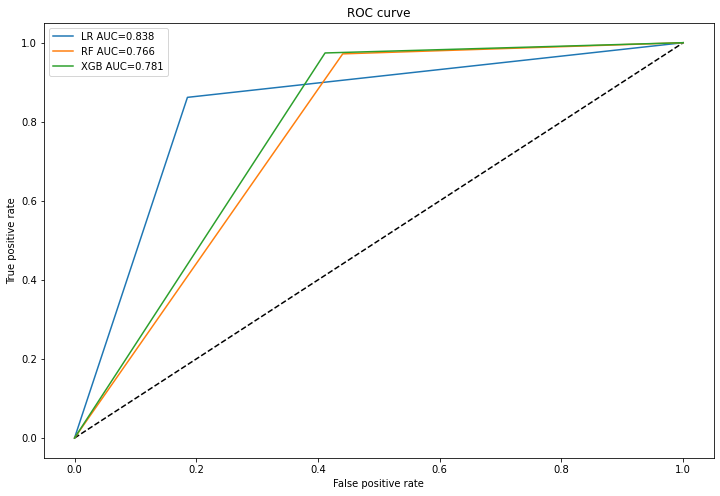

In [112]:
ROC_curve_plots(y_test,y_pred_lrc, y_pred_rfc,y_pred_xgbc2, 'LR', 'RF','XGB')

#### Among all the models accuracy of  Xgboost is optimed after hyper tunning, therefore I am choosing Xgboost as final model for this project

In [113]:
# saving model in pickle file
pkl.dump(y_pred_xgbc2, open('models/XGBoost.pkl', 'wb'))

-

### Building a recommendation system
We will be analyzing the following two recommendation systems:

    1. User-based recommendation system
    2. Item-based recommendation system

To perform this we only need reviews_rating, product name and reviews_username

In [114]:
# creating dataframe with required data
df_recom = df[['name', 'reviews_rating', 'reviews_username']]
df_recom.head()

,name,reviews_rating,reviews_username
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua
1,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
2,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
3,K-Y Love Sensuality Pleasure Gel,1,rebecca
4,K-Y Love Sensuality Pleasure Gel,1,walker557


In [115]:
round(100*(df_recom.isnull().sum()/len(df_recom.index)),2)

name                0.00
reviews_rating      0.00
reviews_username    0.21
dtype: float64

In [116]:
## droping the records that are missing username
df_recom.dropna(subset=['reviews_username'], inplace=True)

<ipython-input-116-bd446f602ce8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recom.dropna(subset=['reviews_username'], inplace=True)


In [117]:
df_recom.shape

(29937, 3)

In [118]:
# checking top 20 reviewers
df_recom['reviews_username'].value_counts().sort_values(ascending=False).head(10)

mike                 41
byamazon customer    41
chris                32
lisa                 16
sandy                15
tony                 15
rick                 15
dave                 14
john                 14
jojo                 13
Name: reviews_username, dtype: int64

We see there are multiple users who have rated multile times. 

We also that byamazon customer is a generic name and not a individual
Lets drop this from our analysis

In [119]:
df_recom = df_recom.drop(df_recom[(df_recom['reviews_username'] == 'byamazon customer')].index)

In [120]:
df_recom.shape

(29896, 3)

In [121]:
## checking for duplicate record for user and product combination
df_recom[df_recom.duplicated(['name', 'reviews_username'])]

,name,reviews_rating,reviews_username
2,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
12,K-Y Love Sensuality Pleasure Gel,1,jds1992
44,"Johnson's Baby Bubble Bath and Wash, 15oz",4,solo
79,Olay Regenerist Deep Hydration Regenerating Cream,3,mylifeinheels
90,Olay Regenerist Deep Hydration Regenerating Cream,3,mylifeinheels
...,...,...,...
29807,L'or233al Paris Elvive Extraordinary Clay Reba...,5,joycakes
29827,L'or233al Paris Elvive Extraordinary Clay Reba...,5,emily95
29841,L'or233al Paris Elvive Extraordinary Clay Reba...,5,brookieboo1994
29921,L'or233al Paris Elvive Extraordinary Clay Reba...,5,talmariejohn


In [122]:
## checking duplicate data for one user 
df_recom[df_recom["reviews_username"] =="dorothy w"]

,name,reviews_rating,reviews_username
1,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
2,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w


In [123]:
## Removing the duplicate records 
df_recom.drop_duplicates(subset=['name', 'reviews_username'],inplace=True)
df_recom.shape

(27586, 3)

In [124]:
# Spliting data into Test and Train
train, test = train_test_split(df_recom, test_size=0.30, random_state=49)

In [125]:
#checking shape of train and test data
print(train.shape)
print(test.shape)

(19310, 3)
(8276, 3)


convert data into matrix format of users vs products

In [126]:
# Pivot the train ratings' dataset into matrix format in which columns are products and the rows are user IDs.
df_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(0)

df_pivot.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Creating dummy train & test dataset for use in predication for not rated products

Dummy train we will try to ignore the product rated by the user, therefore assigning it as 0 during prediction and product not rated by user is assigned 1.

Dummy test is for evaluation. we are only predicting products rated by the user. This is just opposite of dummy_train; and therefore will be assigned 1

In [127]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [128]:
# The product not rated by user is marked as 1 for prediction. 
dummy_train['rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [129]:
# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(1)

In [130]:
dummy_train.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## User Similarity Matrix

In [131]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_pivot, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [132]:
user_correlation.shape

(17843, 17843)

**Using Cosine Similarity:** Cosine Similarity is a measurement that quantifies the similarity between two vectors

Calculating the mean only for the products rated by the user

In [133]:
# Creating a user-product matrix.
df_pivot_sub = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)

In [134]:
df_pivot_sub.head(10)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
08dallas,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.11E+24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10ten,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Normalising** the rating of the products for each user

In [135]:
mean = np.nanmean(df_pivot_sub, axis=1)
df_normalized = (df_pivot_sub.T-mean).T

In [136]:
df_normalized.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06stidriver,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Finding cosine similarity

In [137]:
# Creating the User Similarity Matrix using pairwise_distance function
user_correlation = 1 - pairwise_distances(df_normalized.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### User-User Prediction

Predicting only for the users who are positively related (having positive correlation)

In [138]:
# settng negative user_correlation as 0
user_correlation[user_correlation<0]=0
user_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [139]:
# multiplying user-user correlation with user-product matrix to get rating for each user
user_predicted_ratings = np.dot(user_correlation, df_pivot)
user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [140]:
# checking shape of prediction data
user_predicted_ratings.shape

(17843, 255)

In [141]:
# getting predicted only for users who have not rated in dummy train
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head(10)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.11E+24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1085,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10ten,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
user_final_rating.tail(10)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
zotox,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zsarah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zt313,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zubb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zulaa118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zuttle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zwithanx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zxcsdfd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zyiah4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Finding the top 5 recommendation for the **user**

In [143]:
# Take the user ID as input.
user_input = input("Enter your user name")

#print(user_input)

Enter your user namezsarah


In [144]:
# filtering results for given user id
results = user_final_rating.loc[user_input.lower()].sort_values(ascending=False)[0:5]
results

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest    0.0
Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black                0.0
Olay Regenerist Deep Hydration Regenerating Cream                0.0
Orajel Maximum Strength Toothache Pain Relief Liquid             0.0
Pacific Natural Foods Organic Beef Broth                         0.0
Name: zsarah, dtype: float64

### User-User Evaluation

Evaluating only for product rated by the user

In [145]:
# Find out the common users between test and train dataset
common_users = test[test.reviews_username.isin(train.reviews_username)]
common_users.shape

(1046, 3)

In [146]:
common_users.head()

,name,reviews_rating,reviews_username
15427,Chester's Cheese Flavored Puffcorn Snacks,5,sherry
18753,Clorox Disinfecting Bathroom Cleaner,4,kathyb
18732,Clorox Disinfecting Bathroom Cleaner,4,keebler
22355,Clear Scalp & Hair Therapy Total Care Nourishi...,1,pepper
10687,Clorox Disinfecting Wipes Value Pack Scented 1...,5,ac94


In [147]:
# converting to user-product matrix.
common_user_matrix = common_users.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [148]:
# converting user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [149]:
user_correlation_df['reviews_username'] = df_normalized.index
user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,17833,17834,17835,17836,17837,17838,17839,17840,17841,17842
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
# getting common user data
list_name = common_users.reviews_username.tolist()

user_correlation_df.columns = df_normalized.index.tolist()

user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [151]:
# multiplying common user correlation
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [152]:
# getting common user correlation excluding itself
user_correlation_df_3 = user_correlation_df_2[0:].T

In [153]:
user_correlation_df_3.head()

,1234,1witch,aaron,ac94,acg1,acjuarez08,acv4217,adam,adelynsmom,aep1010,...,woottos,woowoo,worm,wvshopaholic,xmom,xstr8edgex,yohnie1,yvonne,zach,zmom
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaron,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ac94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
acg1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [154]:
# checking for negative values
user_correlation_df_3[user_correlation_df_3<0].head()

,1234,1witch,aaron,ac94,acg1,acjuarez08,acv4217,adam,adelynsmom,aep1010,...,woottos,woowoo,worm,wvshopaholic,xmom,xstr8edgex,yohnie1,yvonne,zach,zmom
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aaron,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ac94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acg1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
# setting all negative values to 0
user_correlation_df_3[user_correlation_df_3<0]=0

In [156]:
# multipling common user matrix with user-user correlation dat
common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_matrix.fillna(0))
common_user_predicted_ratings

array([[0.8660254 , 1.44337567, 0.        , ..., 0.        , 1.3904028 ,
        0.66666667],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.60328193, 0.        , 0.        , ..., 3.81881308, 3.81881308,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [157]:
# checking in test data
dummy_test = common_users.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)

In [158]:
# getting prediction on test data
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings[0:],dummy_test)

Error check: Calculating the **RMSE** for only the products rated by user

In [159]:
# normalising predicted the rating to range between (1 and 5)
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/Users/z062960/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/z062960/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [160]:
# getting common_users
common_users_ = common_users.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [161]:
# checking the total count of non-nan value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [162]:
# generating rmse
rmse = (sum(sum((common_users_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.610102803753877


In [163]:
#saving rating to pickle file
user_final_rating.to_pickle("models/user_recommendation.pkl")

# Item Based Similarity

Taking the transpose of the user-product rating matrix to get item based similarity

In [164]:
df_pivot = train.pivot(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).T

df_pivot.head()

reviews_username,00dog3,01impala,02dakota,02deuce,06stidriver,08dallas,1.11E+24,1085,10ten,11111111aaaaaaaaaaaaaaaaa,...,zotox,zsarah,zt313,zubb,zulaa118,zuttle,zwithanx,zxcsdfd,zyiah4,zzdiane
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
## Normalising the product rating for each product for using the Adujsted Cosine
mean = np.nanmean(df_pivot, axis=1)
df_normalized = (df_pivot.T-mean).T

Finding the cosine similarity using pairwise distances approach

In [166]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_normalized.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [167]:
# setting negative correlation to 0
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Item-Item Prediction

In [168]:
# multiplying with item-user matrix
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0073174 , 0.        ,
        0.00926322],
       [0.        , 0.        , 0.        , ..., 0.01219566, 0.        ,
        0.0154387 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00096765,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00096765,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [169]:
#checking shape
item_predicted_ratings.shape

(17843, 255)

In [170]:
dummy_train.shape

(17843, 255)

In [171]:
## Filtering rating for products not rated by user
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.007317,0.000000,0.009263
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.012196,0.000000,0.015439
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.009757,0.000000,0.012351
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000912,0.0,...,0.0,0.0,0.0,0.006728,0.0,0.0,0.0,0.000000,0.000968,0.000000


#### Finding the top 5 recommendation for the user

In [172]:
# Take the user ID as input
user_input = input("Enter your user name")
print(user_input)

Enter your user namezsarah
zsarah


In [173]:
# Filtering Top 5 products to the user.
resuts = item_final_rating.loc[user_input.lower()].sort_values(ascending=False)[0:5]
resuts

name
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                         25.000000
Clorox Disinfecting Bathroom Cleaner                                               0.686093
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz     0.026993
Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz                         0.018646
Cococare 100% Natural Castor Oil                                                   0.011490
Name: zsarah, dtype: float64

In [174]:
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.007317,0.000000,0.009263
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.012196,0.000000,0.015439
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.009757,0.000000,0.012351
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000912,0.0,...,0.0,0.0,0.0,0.006728,0.0,0.0,0.0,0.000000,0.000968,0.000000


### Item-Item Evaluation

Evaluation for products already rated by the user

In [175]:
common_items =  test[test.name.isin(train.name)]
common_items.shape

(8256, 3)

In [176]:
common_items.head()

,name,reviews_rating,reviews_username
27248,Planes: Fire Rescue (2 Discs) (includes Digita...,3,swangandahit
14482,Clorox Disinfecting Wipes Value Pack Scented 1...,5,carrie4987
28047,Planes: Fire Rescue (2 Discs) (includes Digita...,5,kbuffy
12087,Clorox Disinfecting Wipes Value Pack Scented 1...,5,b831
26054,Godzilla 3d Includes Digital Copy Ultraviolet ...,5,mbennett2283


In [177]:
common_item_based_matrix = common_items.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [178]:
common_item_based_matrix.shape

(193, 7911)

In [179]:
item_correlation_df = pd.DataFrame(item_correlation)

In [180]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [181]:
item_correlation_df['name'] = df_normalized.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [182]:
# getting common item data
list_name = common_items.name.tolist()

item_correlation_df.columns = df_normalized.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [183]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [184]:
item_correlation_df_3.head()

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,...,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Africa's Best No-Lye Dual Conditioning Relaxer System Super,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [185]:
# settng negative correlation to 0
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00163155, 0.        , 0.00342891, ..., 0.00301069, 0.        ,
        0.        ],
       [0.        , 0.00096765, 0.00297664, ..., 0.        , 0.00038706,
        0.00077412],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [186]:
common_item_predicted_ratings.shape

(193, 7911)

Evaluating only on product rated by the user

In [187]:
dummy_test = common_items.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

The products not rated is marked as 0 for evaluation. And make the item- item matrix representaion.

In [188]:
common_items_ = common_items.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [189]:
# normalizing prediction to range between 1 and 5
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/Users/z062960/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/z062960/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [190]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [191]:
rmse = (sum(sum((common_items_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.572043306694704


##### We see that USER based recommendation has low RMSE (2.6) value compared to ITEM based recommendation(3.57).

#### We will use USER based recommendation system 

In [192]:
# saving item based recommandition to pickle file
item_final_rating.to_pickle("item_recommendation.pkl")

-

# Conclusion

### Based on model performance in sentiment analysis and recommendation system; we will use

#### 1. XGBoost model in Sentiment Analysis 

#### 2. User based filtering in recommendation system

-

# Deployment
Testing the deployment code 

In [211]:
data = pkl.load(open('dataset/data.pkl','rb'))

In [212]:
model_rec= pkl.load(open('models/user_recommendation.pkl','rb'))

In [213]:
xgbc= pkl.load(open('models/XGBoost.pkl','rb'))

In [214]:
tdidf= pkl.load(open('models/tfidf_features.pkl','rb'))

In [215]:
model_rec

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",...,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuttle,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zwithanx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zxcsdfd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [216]:
# Take the user ID as input
user_input = input("Enter your user name")
print(user_input)

Enter your user namezwithanx
zwithanx


In [217]:
results = model_rec.loc[user_input].sort_values(ascending=False)[0:5].index
results

Index(['0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest',
       'Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black',
       'Olay Regenerist Deep Hydration Regenerating Cream',
       'Orajel Maximum Strength Toothache Pain Relief Liquid',
       'Pacific Natural Foods Organic Beef Broth'],
      dtype='object', name='name')

In [218]:
df_pred = data[data.name.isin(results)]

In [219]:
df_pred.shape

(714, 13)

In [220]:
df_pred.head()

,id,brand,categories,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_username,user_sentiment,text,sentiment
54,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",Olay Regenerist Deep Hydration Regenerating Cream,2014-09-01T00:00:00.000Z,False,1,I used (and loved) this product for several ye...,New formula is terrible,alnscoob97,Positive,New formula be terrible I use ( and love ) thi...,0
55,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",Olay Regenerist Deep Hydration Regenerating Cream,2015-02-11T00:00:00.000Z,False,1,I have been using Oil of Olay for over 20 year...,PLEASE BRING BACK OLD FORMULA!!!,star33,Negative,PLEASE BRING BACK OLD FORMULA ! ! ! I have be ...,0
56,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",Olay Regenerist Deep Hydration Regenerating Cream,2014-09-07T00:00:00.000Z,False,1,I am so disappointed! I have used this product...,Please bring back the old formula,jacmary,Positive,Please bring back the old formula I be so disa...,0
57,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",Olay Regenerist Deep Hydration Regenerating Cream,2014-07-10T00:00:00.000Z,False,1,I've been using this product for years and it ...,What happened!!,mabelle,Negative,What happen ! ! I 've be use this product for ...,0
58,AV1l8zRZvKc47QAVhnAv,Olay,"Personal Care,Skin Care,Anti-Aging,Beauty,Face...",Olay Regenerist Deep Hydration Regenerating Cream,2014-04-13T00:00:00.000Z,False,1,It took me so long to find a moisturizer that ...,Please Bring Back Old Formula,kayc,Positive,Please Bring Back Old Formula It take me so lo...,0


In [221]:
df_pred['text']

54       New formula be terrible I use ( and love ) thi...
55       PLEASE BRING BACK OLD FORMULA ! ! ! I have be ...
56       Please bring back the old formula I be so disa...
57       What happen ! ! I 've be use this product for ...
58       Please Bring Back Old Formula It take me so lo...
                               ...                        
22094    Arrived quickly and be a perfect fit I like th...
22095    Just what I want ! Grate be precisely what I w...
22096    Exactly what we want ! Heavy duty grate ! Fit ...
22097    Heavy Duty Grate I need a large capacity grate...
22098    Nice sturdy product It 's a nice heavy duty ca...
Name: text, Length: 714, dtype: object

In [222]:
features_pred = tfidf_vectorizer.transform(df_pred['text'])
features_pred

<714x45 sparse matrix of type '<class 'numpy.float64'>'
	with 10255 stored elements in Compressed Sparse Row format>

In [224]:
#df_pred['predicted'] = predictions

In [ ]:
#df_pred

In [ ]:
#df_pred[df_pred['predicted']==1][['name', 'brand']].drop_duplicates()[:5].reset_index(drop=True)